In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 1000)

In [4]:
data = pd.read_csv('instrument_data.csv')
item_data = pd.read_csv('item_data.csv')
#admin_data = pd.read_csv('project\administration_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
data[ (data.value.isnull()) & (data.age==30)].shape

(66951, 9)

In [82]:
data[data.value.isnull()].shape

(2699161, 9)

In [5]:
data=data[~(data.value.isnull())]

In [84]:
data.count()

data_id       1700279
age           1700279
sex           1367140
mom_ed         924606
value         1700279
item_id       1700279
type          1700279
category      1476378
definition    1700279
dtype: int64

In [85]:
data.head()

,data_id,age,sex,mom_ed,value,item_id,type,category,definition
0,129242,27,Female,Some Secondary,produces,item_1,word,sounds,baa baa
3,129242,27,Female,Some Secondary,produces,item_4,word,sounds,grrr
6,129242,27,Female,Some Secondary,produces,item_7,word,sounds,ouch
8,129242,27,Female,Some Secondary,produces,item_9,word,sounds,uh oh
11,129242,27,Female,Some Secondary,produces,item_12,word,sounds,yum yum


In [86]:
data.category.value_counts()

action_words         209494
food_drink           165464
descriptive_words    122816
household            117003
animals              115519
body_parts            78497
games_routines        76762
outside               68724
furniture_rooms       67816
people                64247
clothing              63276
toys                  49133
sounds                47709
locations             42956
places                38322
vehicles              37952
pronouns              35088
helping_verbs         24708
quantifiers           21970
time_words            14897
question_words         9496
connecting_words       4529
Name: category, dtype: int64

In [87]:
data.type.value_counts()

word                  1476378
complexity             151478
how_use_words           20590
word_forms_verbs        16493
word_endings            16468
word_forms_nouns         6442
word_endings_verbs       4868
combine                  4094
word_endings_nouns       3468
Name: type, dtype: int64

In [88]:
data.value.value_counts()

produces     1507649
simple        112405
complex        39073
sometimes      15500
not yet        14069
often          11583
Name: value, dtype: int64

In [6]:
data_success = data[data.value=='produces']#[['data_id','age','sex','mom_ed','value','type']]
data_success.shape

(1507649, 9)

In [90]:
type_sex = data_success.groupby('type').sex.value_counts('data_id')#.sort_values()
type_sex

type                sex   
word                Female    0.519561
                    Male      0.480439
word_endings_nouns  Female    0.556228
                    Male      0.443772
word_endings_verbs  Female    0.544782
                    Male      0.455218
word_forms_nouns    Female    0.521732
                    Male      0.478268
word_forms_verbs    Female    0.549506
                    Male      0.450494
Name: sex, dtype: float64

In [91]:
type_sex_df=pd.DataFrame(type_sex)
type_sex_df=type_sex_df.reset_index(level=0)
type_sex_df.columns=['type','success_ratio']
type_sex_df=type_sex_df.reset_index(level=0)
type_sex_df

,sex,type,success_ratio
0,Female,word,0.519561
1,Male,word,0.480439
2,Female,word_endings_nouns,0.556228
3,Male,word_endings_nouns,0.443772
4,Female,word_endings_verbs,0.544782
5,Male,word_endings_verbs,0.455218
6,Female,word_forms_nouns,0.521732
7,Male,word_forms_nouns,0.478268
8,Female,word_forms_verbs,0.549506
9,Male,word_forms_verbs,0.450494


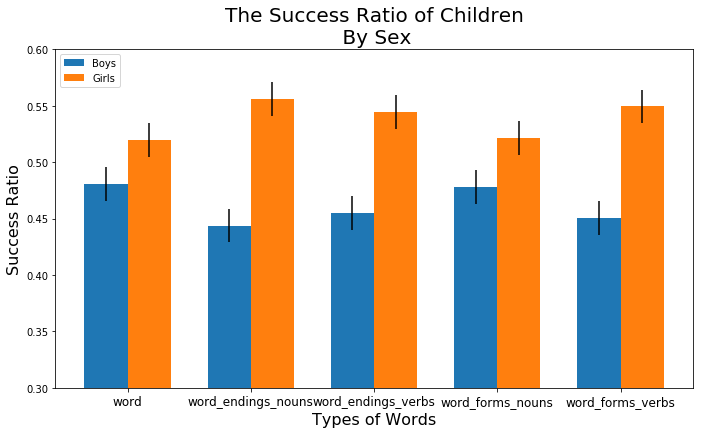

<Figure size 432x288 with 0 Axes>

In [99]:
boys_values, boys_std = type_sex_df[type_sex_df.sex=='Male'].success_ratio, np.std(type_sex_df[type_sex_df.sex=='Male'].success_ratio)
girls_values, girls_std = type_sex_df[type_sex_df.sex=='Female'].success_ratio, np.std(type_sex_df[type_sex_df.sex=='Female'].success_ratio)

ind = np.arange(len(girls_values))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, boys_values, width, yerr=boys_std,
                label='Boys')
rects2 = ax.bar(ind + width/2, girls_values, width, yerr=girls_std,
                label='Girls')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Ratio', fontsize=16)
ax.set_xlabel('Types of Words', fontsize=16)
ax.set_title('The Success Ratio of Children\n By Sex', fontsize=20)
ax.set_xticks(ind)
#plt.xticks(rotation=10)
ax.set_xticklabels(('word','word_endings_nouns', 'word_endings_verbs', 'word_forms_nouns', 'word_forms_verbs'), fontsize=12)
plt.subplots_adjust(right=1.6,top=1.3)
plt.ylim(0.3,0.6)
ax.legend(loc=2)
plt.show()
plt.savefig('1.png')

In [75]:
type_age = data_success.groupby('type').age.value_counts('date_id')
type_age.head(100)

type                age
word                28     0.265263
                    24     0.125914
                    30     0.103801
                    25     0.079793
                    29     0.060585
                    27     0.053608
                    23     0.051372
                    26     0.048278
                    16     0.037812
                    18     0.035326
                    22     0.034290
                    19     0.033531
                    20     0.031008
                    21     0.026449
                    17     0.012970
word_endings_nouns  28     0.296713
                    24     0.128604
                    30     0.119954
                    25     0.079585
                    27     0.063725
                    26     0.062860
                    29     0.047290
                    23     0.037774
                    19     0.035467
                    22     0.034602
                    18     0.028835
                    20     0.022203
    

In [76]:
type_age_df=pd.DataFrame(type_age)
type_age_df=type_age_df.reset_index(level=0)
type_age_df.columns=['type','successful_words_ratio']
type_age_df=type_age_df.reset_index(level=0)
type_age_df.head(100)

,age,type,successful_words_ratio
0,28,word,0.265263
1,24,word,0.125914
2,30,word,0.103801
3,25,word,0.079793
4,29,word,0.060585
5,27,word,0.053608
6,23,word,0.051372
7,26,word,0.048278
8,16,word,0.037812
9,18,word,0.035326


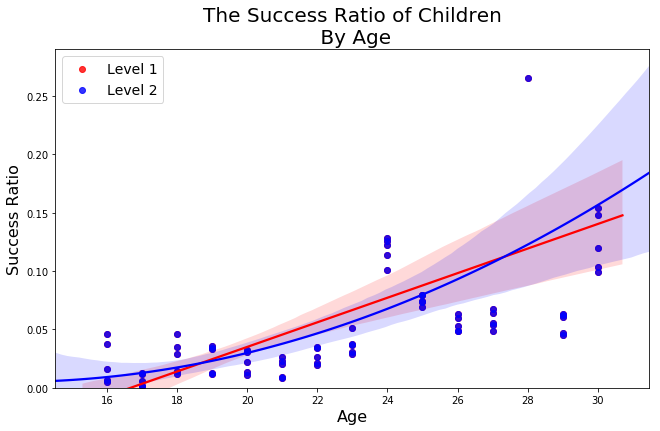

<Figure size 432x288 with 0 Axes>

In [103]:
sns.regplot(x='age', y='successful_words_ratio', data=type_age_df, order=1, label='Level 1', color='red')
sns.regplot(x='age', y='successful_words_ratio', data=type_age_df, order=2, label='Level 2', color='blue')
plt.subplots_adjust(right=1.5,top=1.3)
plt.ylim(0.0, 0.29)
plt.ylabel('Success Ratio', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.title('The Success Ratio of Children\n By Age', fontsize=20)
plt.legend(loc=2, fontsize=14)
plt.show()
plt.savefig('2.png')

In [7]:
moms = data_success.groupby('mom_ed')['data_id'].value_counts()
moms

mom_ed          data_id
College         130393     700
                131380     699
                131535     696
                129940     693
                131657     693
                131712     693
                131632     691
                131967     689
                131752     687
                129799     686
                131544     685
                130588     684
                131682     682
                129565     681
                130369     680
                131621     678
                130087     677
                130394     677
                132009     676
                129796     675
                130258     674
                132018     674
                132031     673
                131216     672
                131550     672
                131583     672
                132042     672
                130150     670
                131410     670
                129584     668
                          ... 
Some Secondary 

In [8]:
moms_df=pd.DataFrame(moms)
moms_df=moms_df.reset_index(level=0)
moms_df.columns=['mom_ed','successful_words']
moms_df=moms_df.reset_index(level=0)
moms_df.data_id=moms_df['data_id'].astype(str)
moms_df

,data_id,mom_ed,successful_words
0,130393,College,700
1,131380,College,699
2,131535,College,696
3,129940,College,693
4,131657,College,693
5,131712,College,693
6,131632,College,691
7,131967,College,689
8,131752,College,687
9,129799,College,686


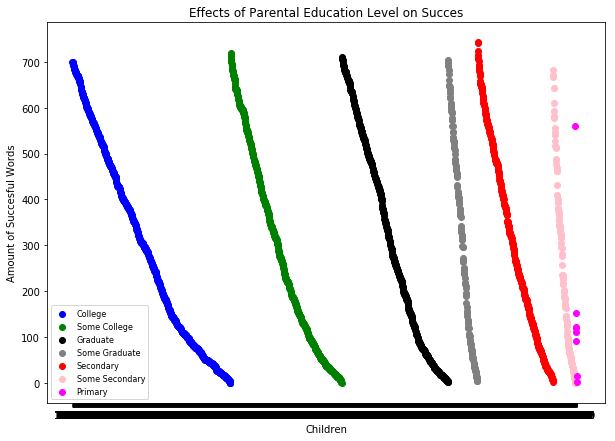

<Figure size 432x288 with 0 Axes>

In [203]:
plt.figure(figsize = (10,7))
#colors=['b' if g=='M' else 'R' for g in df.gender]
c = plt.scatter(moms_df[moms_df.mom_ed=='College']['data_id'],
                moms_df[moms_df.mom_ed=='College']['successful_words'],c='b')
sc = plt.scatter(moms_df[moms_df.mom_ed=='Some College']['data_id'],
                 moms_df[moms_df.mom_ed=='Some College']['successful_words'],c='g')
g = plt.scatter(moms_df[moms_df.mom_ed=='Graduate']['data_id'],
                moms_df[moms_df.mom_ed=='Graduate']['successful_words'],c='k')
sg = plt.scatter(moms_df[moms_df.mom_ed=='Some Graduate']['data_id'],
                 moms_df[moms_df.mom_ed=='Some Graduate']['successful_words'],c='gray')
s = plt.scatter(moms_df[moms_df.mom_ed=='Secondary']['data_id'],
                moms_df[moms_df.mom_ed=='Secondary']['successful_words'],c='r')
ss = plt.scatter(moms_df[moms_df.mom_ed=='Some Secondary']['data_id'],
                 moms_df[moms_df.mom_ed=='Some Secondary']['successful_words'],c='pink')
p = plt.scatter(moms_df[moms_df.mom_ed=='Primary']['data_id'],
                moms_df[moms_df.mom_ed=='Primary']['successful_words'],c='magenta')
_ = plt.xlabel('Children')
_ = plt.ylabel('Amount of Succesful Words')
_ = plt.title ('Effects of Parental Education Level on Succes')
_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
                                   'Some Secondary', 'Primary'),fontsize=8,loc=0,scatterpoints=1)
plt.show()
plt.savefig('3.png')

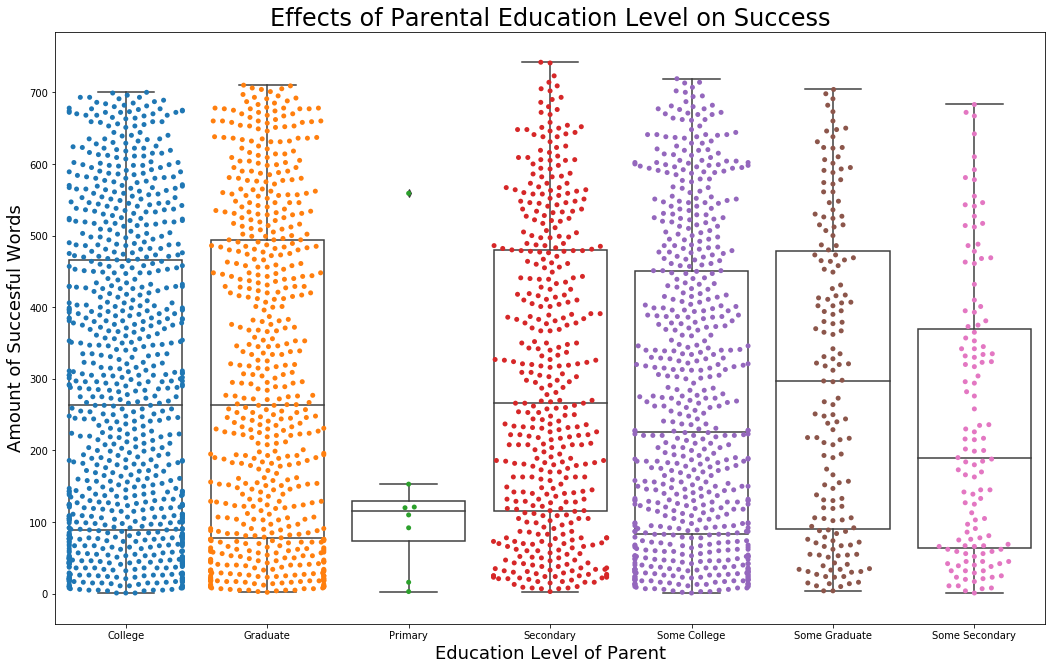

<Figure size 432x288 with 0 Axes>

In [104]:
plt.figure(figsize = (10,7))

sns.swarmplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df)
sns.boxplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df, boxprops={'facecolor':'None'})
_ = plt.xlabel('Education Level of Parent', fontsize=18)
_ = plt.ylabel('Amount of Succesful Words', fontsize=18)
_ = plt.title ('Effects of Parental Education Level on Success', fontsize=24)

plt.subplots_adjust(right=1.5,top=1.3)
plt.show()
plt.savefig('4.png')

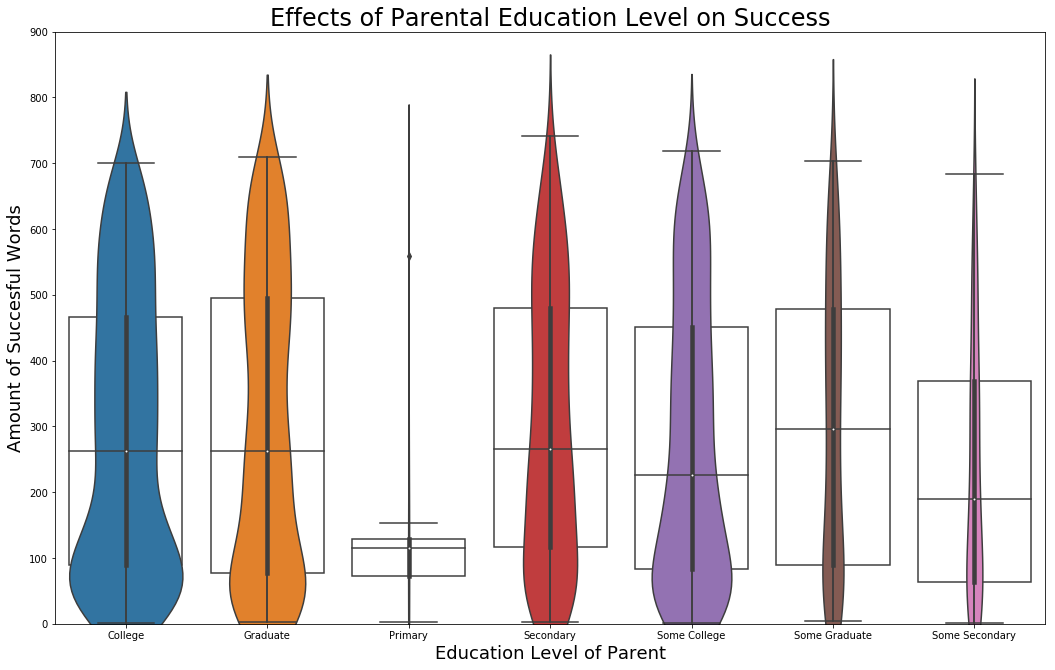

<Figure size 432x288 with 0 Axes>

In [106]:
plt.figure(figsize = (10,7))

#sns.swarmplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df)
sns.boxplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df, boxprops={'facecolor':'None'})
sns.violinplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df, adjust=1/2, scale='count' )
_ = plt.xlabel('Education Level of Parent', fontsize=18)
_ = plt.ylabel('Amount of Succesful Words', fontsize=18)
_ = plt.title ('Effects of Parental Education Level on Success', fontsize=24)
plt.ylim(0,900)
plt.subplots_adjust(right=1.5,top=1.3)
plt.show()
plt.savefig('5.png')

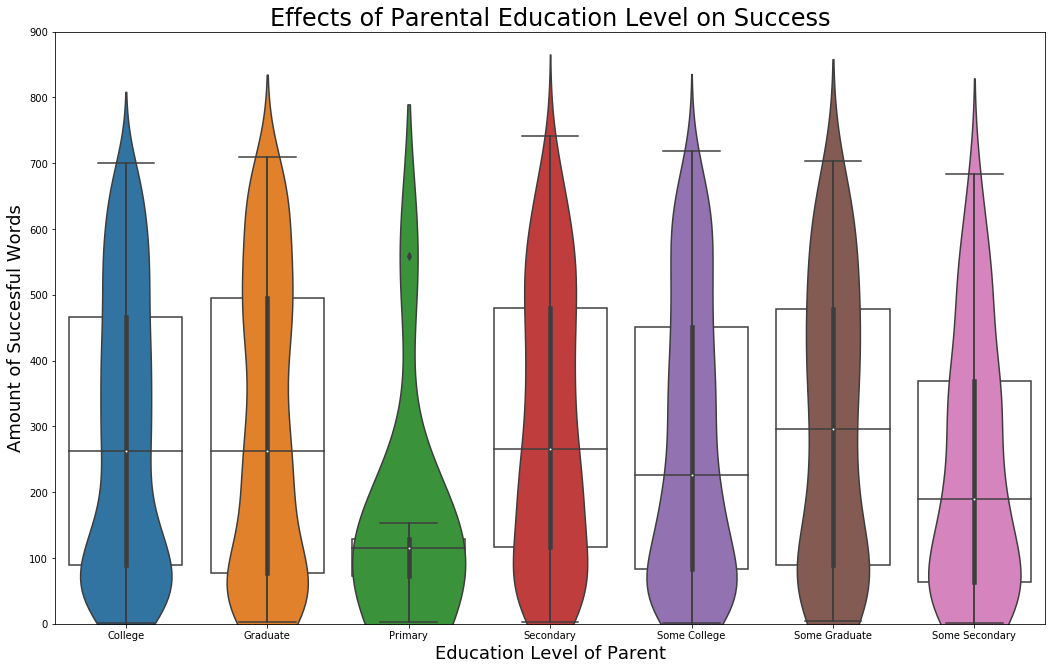

<Figure size 432x288 with 0 Axes>

In [107]:
plt.figure(figsize = (10,7))

#sns.swarmplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df)
sns.boxplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df, boxprops={'facecolor':'None'})
sns.violinplot(moms_df.mom_ed,moms_df.successful_words, data=moms_df, adjust=1 )
_ = plt.xlabel('Education Level of Parent', fontsize=18)
_ = plt.ylabel('Amount of Succesful Words',fontsize=18)
_ = plt.title ('Effects of Parental Education Level on Success', fontsize=24)
plt.ylim(0,900)

plt.subplots_adjust(right=1.5,top=1.3)
plt.show()
plt.savefig('6.png')

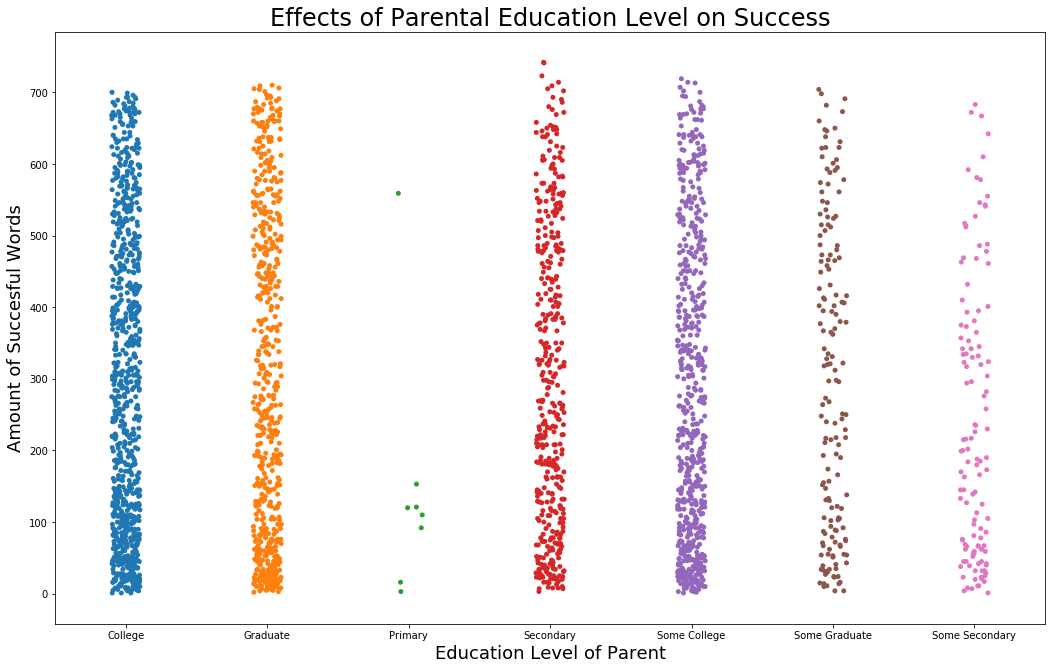

<Figure size 432x288 with 0 Axes>

In [108]:
plt.figure(figsize = (10,7))

sns.stripplot(moms_df.mom_ed,moms_df.successful_words)

_ = plt.xlabel('Education Level of Parent',fontsize=18)
_ = plt.ylabel('Amount of Succesful Words', fontsize=18)
_ = plt.title ('Effects of Parental Education Level on Success', fontsize=24)

plt.subplots_adjust(right=1.5,top=1.3)
plt.show()
plt.savefig('7.png')

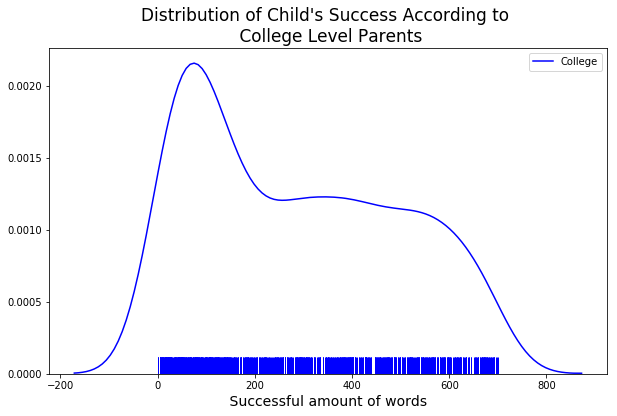

In [50]:
plt.figure(figsize=(10,6))
c=sns.distplot(moms_df[moms_df.mom_ed=='College']['successful_words'], 
               rug='False', bins=100, color = 'b', hist=False, label='College')

plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success According to \n College Level Parents", fontsize=17)
#_ = plt.legend(c,'College')
#plt.ylim(0,0.008)
plt.show()

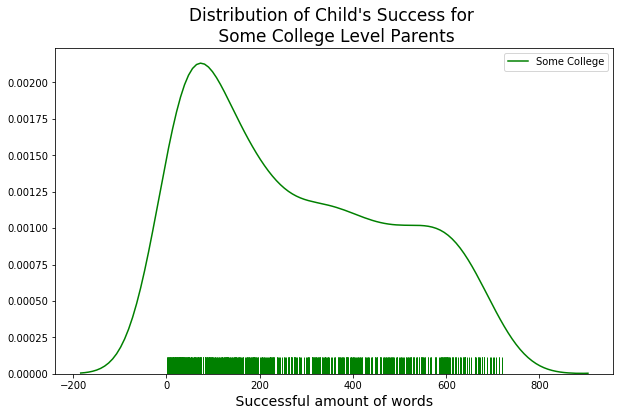

In [51]:
plt.figure(figsize=(10,6))

sc=sns.distplot(moms_df[moms_df.mom_ed=='Some College']['successful_words'],
               rug='False', bins=100, color = 'g', hist=False, label='Some College')

plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success for \n Some College Level Parents", fontsize=17)
#_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
#                                   'Some Secondary', 'Primary'))
#plt.ylim(0,0.008)
plt.show()

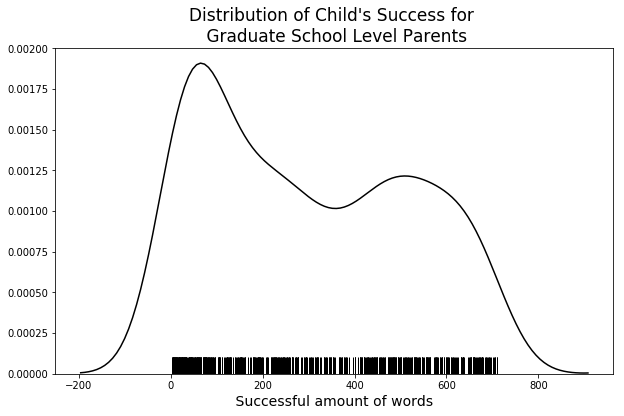

In [52]:
plt.figure(figsize=(10,6))

g=sns.distplot(moms_df[moms_df.mom_ed=='Graduate']['successful_words'], 
               rug='False', bins=100, color = 'k', hist=False)

plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success for \n Graduate School Level Parents", fontsize=17)
#_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
#                                   'Some Secondary', 'Primary'))
#plt.ylim(0,0.008)
plt.show()

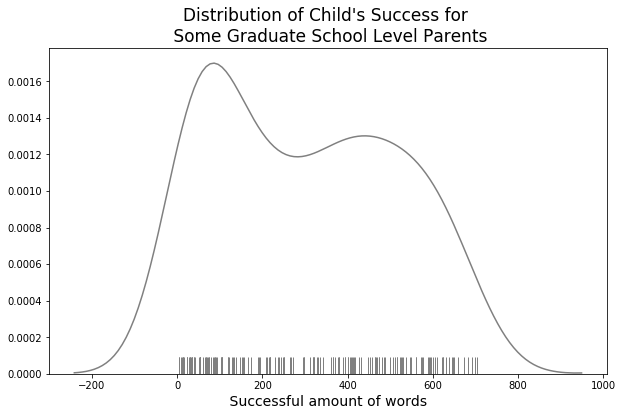

In [53]:
plt.figure(figsize=(10,6))

sg=sns.distplot(moms_df[moms_df.mom_ed=='Some Graduate']['successful_words'], 
                rug='False', bins=100, color = 'gray', hist=False)

plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success for \n Some Graduate School Level Parents", fontsize=17)
#_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
#                                   'Some Secondary', 'Primary'))
#plt.ylim(0,0.008)
plt.show()

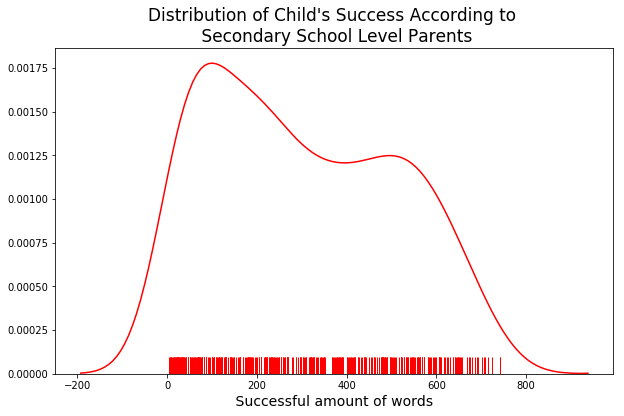

In [54]:
plt.figure(figsize=(10,6))

s=sns.distplot(moms_df[moms_df.mom_ed=='Secondary']['successful_words'], 
               rug='False', bins=100, color = 'r', hist=False)

plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success According to \n Secondary School Level Parents", fontsize=17)
#_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
#                                   'Some Secondary', 'Primary'))
#plt.ylim(0,0.008)
plt.show()

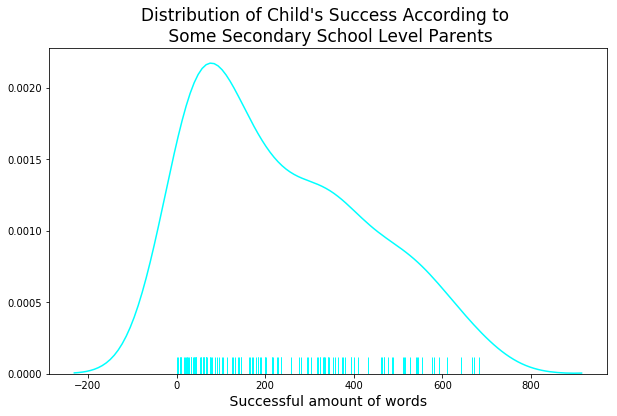

In [55]:
plt.figure(figsize=(10,6))

ss=sns.distplot(moms_df[moms_df.mom_ed=='Some Secondary']['successful_words'], 
                rug='False', bins=100, color = 'cyan', hist=False)

plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success According to \n Some Secondary School Level Parents", fontsize=17)
#_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
#                                   'Some Secondary', 'Primary'))
#plt.ylim(0,0.008)
plt.show()

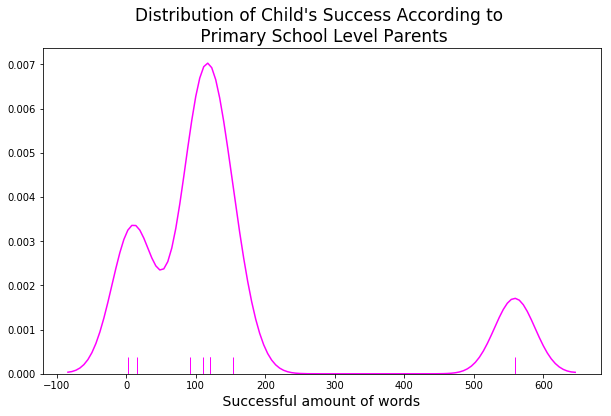

In [56]:
plt.figure(figsize=(10,6))

p=sns.distplot(moms_df[moms_df.mom_ed=='Primary']['successful_words'], 
               rug='False', bins=100, color = 'magenta',hist=False)
plt.xlabel(' Successful amount of words ', fontsize=14)
#plt.ylabel('PDF ', fontsize=14)
plt.title("Distribution of Child's Success According to \n Primary School Level Parents", fontsize=17)
#_ = plt.legend((c,sc,g,sg,s,ss,p),('College','Some College', 'Graduate', 'Some Graduate', 'Secondary', 
#                                   'Some Secondary', 'Primary'))
#plt.ylim(0,0.008)
plt.show()

In [143]:
moms_df.mom_ed.value_counts()

College           869
Some College      612
Graduate          584
Secondary         415
Some Graduate     162
Some Secondary    123
Primary             8
Name: mom_ed, dtype: int64

In [71]:
words = data_success.definition.value_counts().head(30)
words

mommy*       5348
daddy*       5316
ball         5082
uh oh        4937
bye          4935
dog          4774
no           4760
shoe         4585
baby         4505
hi           4475
book         4472
moo          4439
woof woof    4410
banana       4366
meow         4317
eye          4296
nose         4276
car          4270
bird         4225
duck         4212
balloon      4163
juice        4101
grandma*     4101
grrr         4072
ouch         4069
ear          4067
hot          4063
cookie       4051
cat          4049
milk         4047
Name: definition, dtype: int64

In [72]:
words_df=pd.DataFrame(words)
words_df=words_df.reset_index(level=0)
words_df.columns=['word','repetition']
#words_df=words_df.reset_index(level=0)
#words_df.data_id=words_df['data_id'].astype(str)
words_df

,word,repetition
0,mommy*,5348
1,daddy*,5316
2,ball,5082
3,uh oh,4937
4,bye,4935
5,dog,4774
6,no,4760
7,shoe,4585
8,baby,4505
9,hi,4475


In [35]:
list_tex = list(data_success.definition)
list_tex

['baa baa',
 'grrr',
 'ouch',
 'uh oh',
 'yum yum',
 'animal',
 'bear',
 'bird',
 'bug',
 'bunny',
 'cat',
 'chicken (animal)',
 'dog',
 'duck',
 'fish (animal)',
 'horse',
 'kitty',
 'monkey',
 'mouse',
 'penguin',
 'pony',
 'puppy',
 'teddybear',
 'airplane',
 'bicycle',
 'boat',
 'bus',
 'car',
 'firetruck',
 'helicopter',
 'motorcycle',
 'stroller',
 'train',
 'tricycle',
 'truck',
 'ball',
 'balloon',
 'block',
 'book',
 'bubbles',
 'crayon',
 'doll',
 'game',
 'pen',
 'pencil',
 'present',
 'story',
 'toy (object)',
 'apple',
 'banana',
 'beans',
 'bread',
 'cake',
 'candy',
 'carrots',
 'cereal',
 'cheerios',
 'cheese',
 'chicken (food)',
 'chocolate',
 'coke',
 'cookie',
 'corn',
 'cracker',
 'donut',
 'drink (beverage)',
 'egg',
 'food',
 'french fries',
 'grapes',
 'gum',
 'hamburger',
 'ice',
 'ice cream',
 'jello',
 'jelly',
 'juice',
 'lollipop',
 'meat',
 'melon',
 'milk',
 'muffin',
 'noodles',
 'nuts',
 'orange (food)',
 'pancake',
 'peanut butter',
 'pickle',
 'pizza',

In [57]:
list_text = []
for item in list_tex:
    if '(' in item:
        item=item[:item.find('(')]
    elif '*' in item:
        item=item[:item.find('*')]
    else:
        pass
    list_text.append(item)
len(list_text)

1507649

In [66]:
var_text = list_text[0]
for x in range(len(list_text)):
    x = x+1
    var_text = var_text + ' ' + list_text[x]

KeyboardInterrupt: 

In [67]:
var_text.count(' ')

1071501

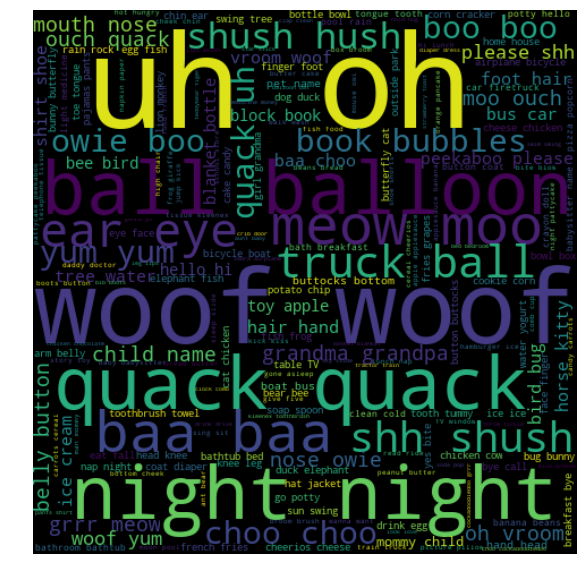

<Figure size 432x288 with 0 Axes>

In [68]:
# Libraries
from wordcloud import WordCloud
 
# Create a list of word
text=var_text
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=10, y=0)
plt.show()
plt.savefig('pic.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198FF679208>,
      dtype=object)

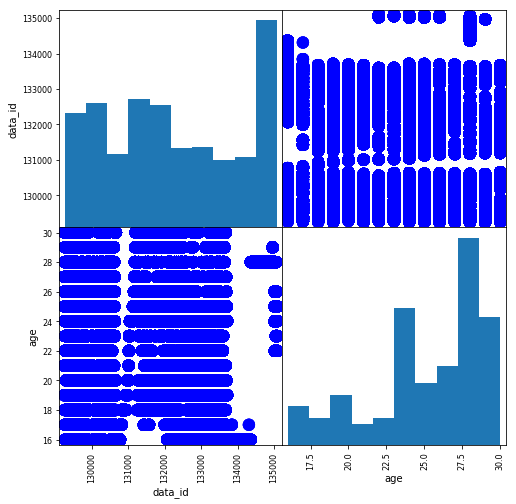

In [14]:
pd.scatter_matrix(data_success, c='b', figsize=[8,8], s=150, marker='o')

In [12]:
data_success.head()

,data_id,age,sex,mom_ed,value,item_id,type,category,definition
0,129242,27,Female,Some Secondary,produces,item_1,word,sounds,baa baa
3,129242,27,Female,Some Secondary,produces,item_4,word,sounds,grrr
6,129242,27,Female,Some Secondary,produces,item_7,word,sounds,ouch
8,129242,27,Female,Some Secondary,produces,item_9,word,sounds,uh oh
11,129242,27,Female,Some Secondary,produces,item_12,word,sounds,yum yum
